# Explore Variant Annotations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import cellink as cl
from pathlib import Path
import matplotlib.pyplot as plt
from plotnine import *  # noqa: F403

/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
DATA = Path("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/")
gdata_path = DATA / "filter_vcf_r08/chr22.dose.filtered.R2_0.8.vcz"
vep_annotation_file = "/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/annotations/onek1k1_all_variants_annotated_vep.txt"

In [5]:
package_dir = Path("/data/ouga/home/ag_gagneur/hoev/git/sc-genetics")
gdata_path = package_dir / "tests/data/chr22.dose.filtered.R2_0.8.vcz"
vep_annotation_file = package_dir / "tests/data/variants_vep_annotated.txt"

## Load data as zarr file 

In [6]:
gdata = cl.io.read_sgkit_zarr(gdata_path)
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'filter'

## Write variants to VCF for annotation 

In [7]:
# cl.tl.write_variants_to_vcf(gdata, out_file=package_dir / "tests/data/variants.vcf")

## Annotate variants

### Using VEP 

### run VEP

In [9]:
# cl.tl.run_vep(config_file,
#              input_vcf="variants.vcf",
#              output=anno_file) #writes "variant_vep_annotated.txt"


### add VEP annos gdata 

In [10]:
cl.tl.add_vep_annos_to_gdata(vep_anno_file=vep_annotation_file, gdata=gdata, dummy_consequence=True)
gdata.uns["variant_annotation_vep"]

[2025-01-15 16:54:37,347] INFO:cellink.tl._annotate_snps_genotype_data: Preparing VEP annotations for addition to gdata
[2025-01-15 16:54:37,348] INFO:cellink.tl._annotate_snps_genotype_data: Reading annotation file /data/ouga/home/ag_gagneur/hoev/git/sc-genetics/tests/data/variants_vep_annotated.txt


[2025-01-15 16:54:37,833] INFO:cellink.tl._annotate_snps_genotype_data: Annotation file loaded
[2025-01-15 16:54:37,955] INFO:cellink.tl._annotate_snps_genotype_data: Annotation columns: ['snp_id', 'Location', 'Allele', 'gene_id', 'transcript_id', 'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation', 'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'BIOTYPE', 'CANONICAL', 'ENSP', 'SIFT', 'PolyPhen', 'gnomADe_AF', 'gnomADe_AFR_AF', 'gnomADe_AMR_AF', 'gnomADe_ASJ_AF', 'gnomADe_EAS_AF', 'gnomADe_FIN_AF', 'gnomADe_NFE_AF', 'gnomADe_OTH_AF', 'gnomADe_SAS_AF', 'CLIN_SIG', 'SOMATIC', 'PHENO', 'CADD_PHRED', 'CADD_RAW', 'TSSDistance']
[2025-01-15 16:54:41,036] INFO:cellink.tl._annotate_snps_genotype_data: Changing dtype of categorical columns ['chrom', 'pos', 'a0', 'a1', 'gene_id', 'transcript_id', 'IMPACT', 'Existing_variation', 'gnomADe_ASJ_AF', 'CANONICAL', 'gnomADe_FIN_AF', 'gnomADe_AF', 'DISTANCE', 'Amino_acids', 'ENSP', 

,chrom,pos,a0,a1,gene_id,transcript_id,Consequence_3_prime_UTR_variant,Consequence_5_prime_UTR_variant,Consequence_NMD_transcript_variant,Consequence_coding_sequence_variant,...,Protein_position,SOMATIC,cDNA_position,TSSDistance,gnomADe_NFE_AF,SIFT,FLAGS,PolyPhen,Codons,gnomADe_AMR_AF
snp_id,,,,,,,,,,,,,,,,,,,,,
22_16849573_A_G,22.0,16849573.0,A,G,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16849971_A_T,22.0,16849971.0,A,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16850437_G_A,22.0,16850437.0,G,A,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16851225_C_T,22.0,16851225.0,C,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16851356_C_T,22.0,16851356.0,C,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22_51211031_A_G,22.0,51211031.0,A,G,ENSG00000079974,ENST00000395593,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_51213613_C_T,22.0,51213613.0,C,T,ENSG00000079974,ENST00000395593,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_51213613_C_T,22.0,51213613.0,C,T,ENSG00000184319,ENST00000496652,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN


In [11]:
gdata.uns["variant_annotation_vep"].dtypes

chrom                                              float64
pos                                                float64
a0                                                  object
a1                                                  object
gene_id                                             object
transcript_id                                       object
Consequence_3_prime_UTR_variant                      int64
Consequence_5_prime_UTR_variant                      int64
Consequence_NMD_transcript_variant                   int64
Consequence_coding_sequence_variant                  int64
Consequence_downstream_gene_variant                  int64
Consequence_incomplete_terminal_codon_variant        int64
Consequence_intergenic_variant                       int64
Consequence_intron_variant                           int64
Consequence_mature_miRNA_variant                     int64
Consequence_missense_variant                         int64
Consequence_non_coding_transcript_exon_variant       int

In [12]:
# cl.tl.add_vep_annos_to_gdata(vep_anno_file = package_dir / "tests/data/variants_vep_annotated.txt",
#                                 gdata = gdata,
#                                 dummy_consequence = False)
# gdata.uns["variant_annotation_vep"]

### Combine annotations from different tools 

In [13]:
cl.tl.combine_annotations(gdata, ["vep"])
gdata

[2025-01-15 16:54:41,990] WARNING:cellink.tl._annotate_snps_genotype_data: Function still under development until it can be tested with other annotations


AnnData object with n_obs × n_vars = 1034 × 143083
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    uns: 'variant_annotation_vep', 'variant_annotation'
    varm: 'filter'

In [14]:
gdata.uns["variant_annotation"]

,chrom,pos,a0,a1,gene_id,transcript_id,Consequence_3_prime_UTR_variant,Consequence_5_prime_UTR_variant,Consequence_NMD_transcript_variant,Consequence_coding_sequence_variant,...,Protein_position,SOMATIC,cDNA_position,TSSDistance,gnomADe_NFE_AF,SIFT,FLAGS,PolyPhen,Codons,gnomADe_AMR_AF
snp_id,,,,,,,,,,,,,,,,,,,,,
22_16849573_A_G,22.0,16849573.0,A,G,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16849971_A_T,22.0,16849971.0,A,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16850437_G_A,22.0,16850437.0,G,A,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16851225_C_T,22.0,16851225.0,C,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16851356_C_T,22.0,16851356.0,C,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22_51211031_A_G,22.0,51211031.0,A,G,ENSG00000079974,ENST00000395593,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_51213613_C_T,22.0,51213613.0,C,T,ENSG00000079974,ENST00000395593,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_51213613_C_T,22.0,51213613.0,C,T,ENSG00000184319,ENST00000496652,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN


## Aggregate to one row per variant 

In [15]:
print(len(gdata.uns["variant_annotation_vep"].columns))
for agg_type in ["first", "unique_list_max"]:  # "list", "str"]:
    res = cl.tl.aggregate_annotations_for_varm(gdata, "variant_annotation_vep", agg_type=agg_type, return_data=True)
    print(len(res))
    print(len(res.columns))
gdata

59
[2025-01-15 16:54:42,205] INFO:cellink.tl._annotate_snps_genotype_data: Aggregating using method: first
143083
59
[2025-01-15 16:54:42,331] INFO:cellink.tl._annotate_snps_genotype_data: Aggregating using method: unique_list_max
[2025-01-15 16:54:42,977] INFO:cellink.tl._annotate_snps_genotype_data: Columns to aggregate: ['gene_id', 'transcript_id', 'Consequence_3_prime_UTR_variant', 'Consequence_5_prime_UTR_variant', 'Consequence_NMD_transcript_variant', 'Consequence_downstream_gene_variant', 'Consequence_intron_variant', 'Consequence_mature_miRNA_variant', 'Consequence_missense_variant', 'Consequence_non_coding_transcript_exon_variant', 'Consequence_non_coding_transcript_variant', 'Consequence_splice_acceptor_variant', 'Consequence_splice_donor_5th_base_variant', 'Consequence_splice_donor_region_variant', 'Consequence_splice_donor_variant', 'Consequence_splice_polypyrimidine_tract_variant', 'Consequence_splice_region_variant', 'Consequence_stop_gained', 'Consequence_stop_retained_v

AnnData object with n_obs × n_vars = 1034 × 143083
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    uns: 'variant_annotation_vep', 'variant_annotation'
    varm: 'filter', 'variant_annotation'

In [16]:
gdata.varm["variant_annotation"]

,chrom,pos,a0,a1,gene_id,transcript_id,Consequence_3_prime_UTR_variant,Consequence_5_prime_UTR_variant,Consequence_NMD_transcript_variant,Consequence_coding_sequence_variant,...,Protein_position,SOMATIC,cDNA_position,TSSDistance,gnomADe_NFE_AF,SIFT,FLAGS,PolyPhen,Codons,gnomADe_AMR_AF
snp_id,,,,,,,,,,,,,,,,,,,,,
22_16849573_A_G,22.0,16849573.0,A,G,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16849971_A_T,22.0,16849971.0,A,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16850437_G_A,22.0,16850437.0,G,A,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16851225_C_T,22.0,16851225.0,C,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_16851356_C_T,22.0,16851356.0,C,T,-,-,0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22_51202748_A_G,22.0,51202748.0,A,G,"ENSG00000079974,ENSG00000184319","ENST00000395593,ENST00000496652",0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_51208568_G_T,22.0,51208568.0,G,T,"ENSG00000184319,ENSG00000079974","ENST00000496652,ENST00000395593",0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN
22_51211031_A_G,22.0,51211031.0,A,G,"ENSG00000184319,ENSG00000079974","ENST00000496652,ENST00000395593",0,0,0,0,...,-,-,-,NaN,NaN,NaN,-,NaN,-,NaN


## Test writing

In [17]:
gdata.write("gdata.h5ad")  # test

... storing 'chrom' as categorical
... storing 'a0' as categorical
... storing 'a1' as categorical
... storing 'id' as categorical


## Explore/Plot annotations

In [56]:
anno = cl.tl.aggregate_annotations_for_varm(gdata, "variant_annotation_vep", agg_type="first", return_data=True)
shared_cols = list(set(gdata.var.columns).intersection(anno.columns))
print(shared_cols)
anno = anno.drop(columns=shared_cols)
anno = anno.join(gdata.var)
anno

[2025-01-15 16:40:03,138] INFO:cellink.tl._annotate_snps_genotype_data: Aggregating using method: first


['pos', 'chrom', 'a1', 'a0']


,gene_id,transcript_id,Consequence_3_prime_UTR_variant,Consequence_5_prime_UTR_variant,Consequence_NMD_transcript_variant,Consequence_coding_sequence_variant,Consequence_downstream_gene_variant,Consequence_incomplete_terminal_codon_variant,Consequence_intergenic_variant,Consequence_intron_variant,...,a0,a1,AF,ER2,maf,R2,contig,id,id_mask,quality
snp_id,,,,,,,,,,,,,,,,,,,,,
22_16849573_A_G,-,-,0,0,0,0,0,0,1,0,...,A,G,0.39991,NaN,0.39991,0.85929,0,22:16849573,False,NaN
22_16849971_A_T,-,-,0,0,0,0,0,0,1,0,...,A,T,0.39455,NaN,0.39455,0.88142,0,22:16849971,False,NaN
22_16850437_G_A,-,-,0,0,0,0,0,0,1,0,...,G,A,0.38920,NaN,0.38920,0.90397,0,22:16850437,False,NaN
22_16851225_C_T,-,-,0,0,0,0,0,0,1,0,...,C,T,0.39466,NaN,0.39466,0.89089,0,22:16851225,False,NaN
22_16851356_C_T,-,-,0,0,0,0,0,0,1,0,...,C,T,0.38772,NaN,0.38772,0.90711,0,22:16851356,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22_51202748_A_G,ENSG00000079974,ENST00000395593,0,0,0,0,1,0,0,0,...,A,G,0.06811,NaN,0.06811,0.90748,0,22:51202748,False,NaN
22_51208568_G_T,ENSG00000079974,ENST00000395593,0,0,0,0,0,0,0,1,...,G,T,0.06645,NaN,0.06645,0.86887,0,22:51208568,False,NaN
22_51211031_A_G,ENSG00000184319,ENST00000496652,0,0,0,0,0,0,0,1,...,A,G,0.06472,NaN,0.06472,0.85566,0,22:51211031,False,NaN


### histogram for any annotation


In [43]:
anno.columns

Index(['chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id',
       'id_mask', 'quality', 'gnomADe_AF', 'gnomADe_EAS_AF', 'CADD_RAW',
       'gnomADe_OTH_AF', 'PHENO', 'gnomADe_AFR_AF', 'CADD_PHRED',
       'Consequence_start_lost', 'gnomADe_ASJ_AF', 'Existing_variation',
       'Location', 'gnomADe_FIN_AF', 'gnomADe_SAS_AF', 'gnomADe_NFE_AF',
       'Feature_type', 'Consequence_intergenic_variant', 'Allele',
       'gnomADe_AMR_AF', 'CLIN_SIG', 'SOMATIC', 'Gene', 'Feature',
       'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids',
       'Codons', 'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'BIOTYPE',
       'CANONICAL', 'ENSP', 'SIFT', 'PolyPhen', 'TSSDistance',
       'Consequence_3_prime_UTR_variant', 'Consequence_5_prime_UTR_variant',
       'Consequence_NMD_transcript_variant',
       'Consequence_coding_sequence_variant',
       'Consequence_downstream_gene_variant',
       'Consequence_incomplete_terminal_codon_variant',
       'Consequence_intron_

<Axes: >

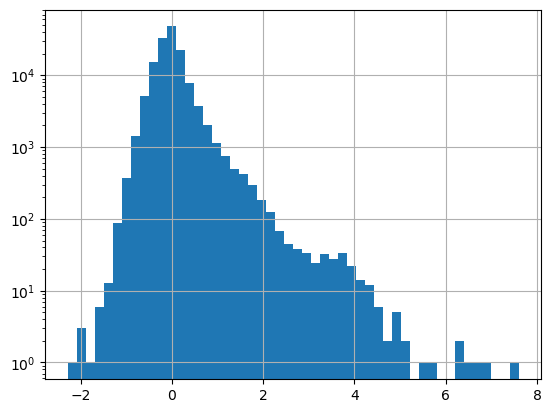

In [27]:
anno["CADD_RAW"].hist(bins=50, log=True)

Text(0.5, 0, 'TSSDistance')

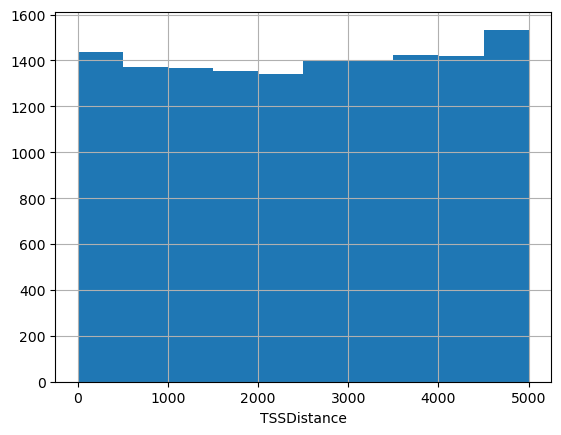

In [28]:
anno["TSSDistance"].dropna().hist()
plt.xlabel("TSSDistance")

In [33]:
# anno.query("Gene != '-'").groupby("Gene").size().hist(log=True, bins=100)
# plt.xlabel("Unique Variants per Gene")

In [34]:
anno["IMPACT"].unique()

array(['MODIFIER', 'MODERATE', 'LOW', 'HIGH'], dtype=object)

In [35]:
vars_to_keep = anno[anno["IMPACT"] == "HIGH"].index

In [36]:
high_impact_count = pd.Series(gdata[:, gdata.var_names.isin(vars_to_keep)].X.sum(axis=1))
high_impact_count.index = gdata.obs.index
high_impact_count.index[high_impact_count.argmax()]

'13_13'

<Axes: >

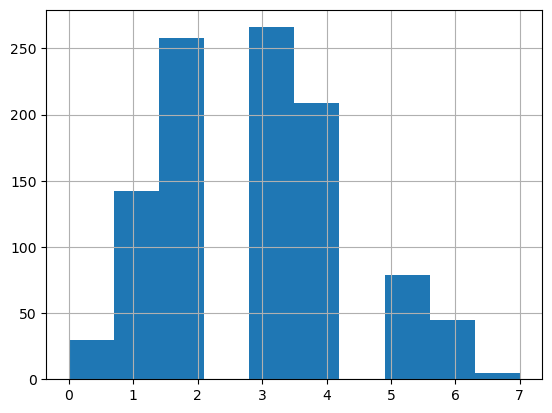

In [37]:
high_impact_count.hist()

### Analyse variant consequences

#### All unique variants

In [58]:
c_counts

,Consequence,count
0,Consequence_3_prime_UTR_variant,4.246207e+05
1,Consequence_5_prime_UTR_variant,5.816825e+04
2,Consequence_NMD_transcript_variant,3.545177e+05
3,Consequence_coding_sequence_variant,8.343760e+02
4,Consequence_downstream_gene_variant,3.559200e+06
5,Consequence_incomplete_terminal_codon_variant,8.343760e+02
6,Consequence_intergenic_variant,9.156695e+06
7,Consequence_intron_variant,1.847454e+07
8,Consequence_mature_miRNA_variant,6.809097e+02
9,Consequence_missense_variant,1.593811e+05


In [59]:
c_counts = (
    anno_c.multiply(anno["maf"] * 2 * gdata.n_obs, axis=0)
    .sum(axis=0)
    .to_frame(name="count")
    .reset_index(names=["Consequence"])
)
# c_counts = c_counts.merge(anno_impact)
c_counts["Consequence"] = c_counts["Consequence"].str.replace("Consequence_", "")
c_counts["Consequence"] = pd.Categorical(
    c_counts["Consequence"], categories=c_counts.sort_values("count")["Consequence"], ordered=True
)
c_counts

,Consequence,count
0,3_prime_UTR_variant,4.246207e+05
1,5_prime_UTR_variant,5.816825e+04
2,NMD_transcript_variant,3.545177e+05
3,coding_sequence_variant,8.343760e+02
4,downstream_gene_variant,3.559200e+06
5,incomplete_terminal_codon_variant,8.343760e+02
6,intergenic_variant,9.156695e+06
7,intron_variant,1.847454e+07
8,mature_miRNA_variant,6.809097e+02
9,missense_variant,1.593811e+05


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


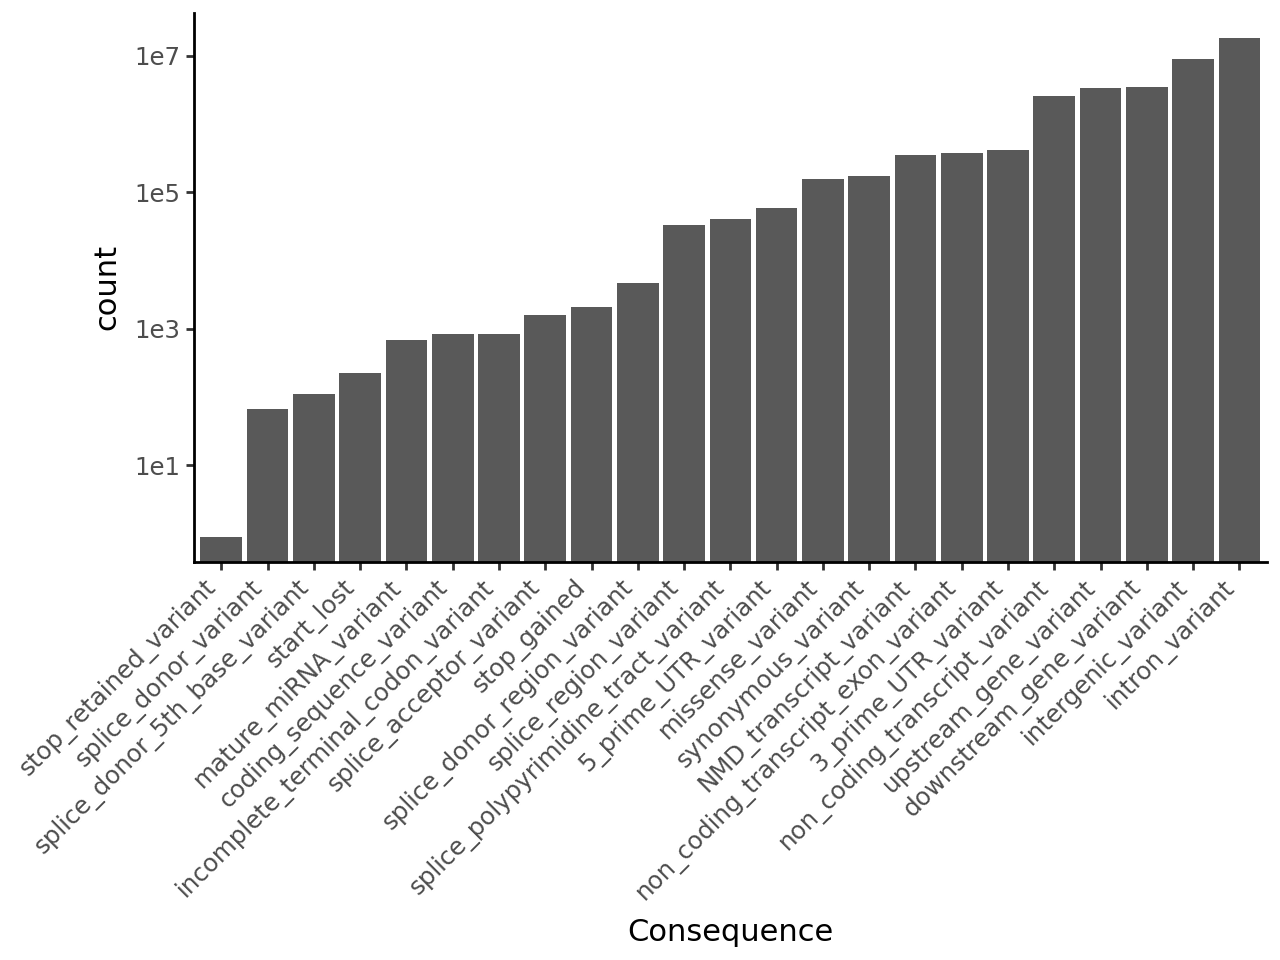

In [60]:
plot = (
    ggplot(c_counts, aes(x="Consequence", y="count"))  # Specify the x and y variables
    + geom_bar(stat="identity")  # Add the boxplot layer
    + theme_classic()  # Optional: use a clean theme
    + scale_y_log10()
    + theme(axis_text_x=element_text(angle=45, hjust=1, vjust=1))
)
plot

#### Consquences per individual

In [62]:
res_list = []
for col in c_cols:
    res = pd.Series(gdata[:, gdata.var_names.isin(anno[anno[col] == 1].index)].X.sum(axis=1), name=col)
    res_list.append(res)
c_counts = pd.concat(res_list, axis=1)
c_counts = c_counts.melt(value_name="variants per individual", var_name="Consequence")

# c_counts = c_counts.merge(anno_impact)

c_counts["Consequence"] = c_counts["Consequence"].str.replace("Consequence_", "")

median_values = c_counts.groupby("Consequence")["variants per individual"].median().sort_values()

c_counts["Consequence"] = pd.Categorical(c_counts["Consequence"], categories=median_values.index, ordered=True)

c_counts

,Consequence,variants per individual
0,3_prime_UTR_variant,519
1,3_prime_UTR_variant,496
2,3_prime_UTR_variant,568
3,3_prime_UTR_variant,530
4,3_prime_UTR_variant,509
...,...,...
23777,upstream_gene_variant,4850
23778,upstream_gene_variant,4832
23779,upstream_gene_variant,4410
23780,upstream_gene_variant,4999


In [102]:
from plotnine import *

/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 5181 rows containing non-finite values.


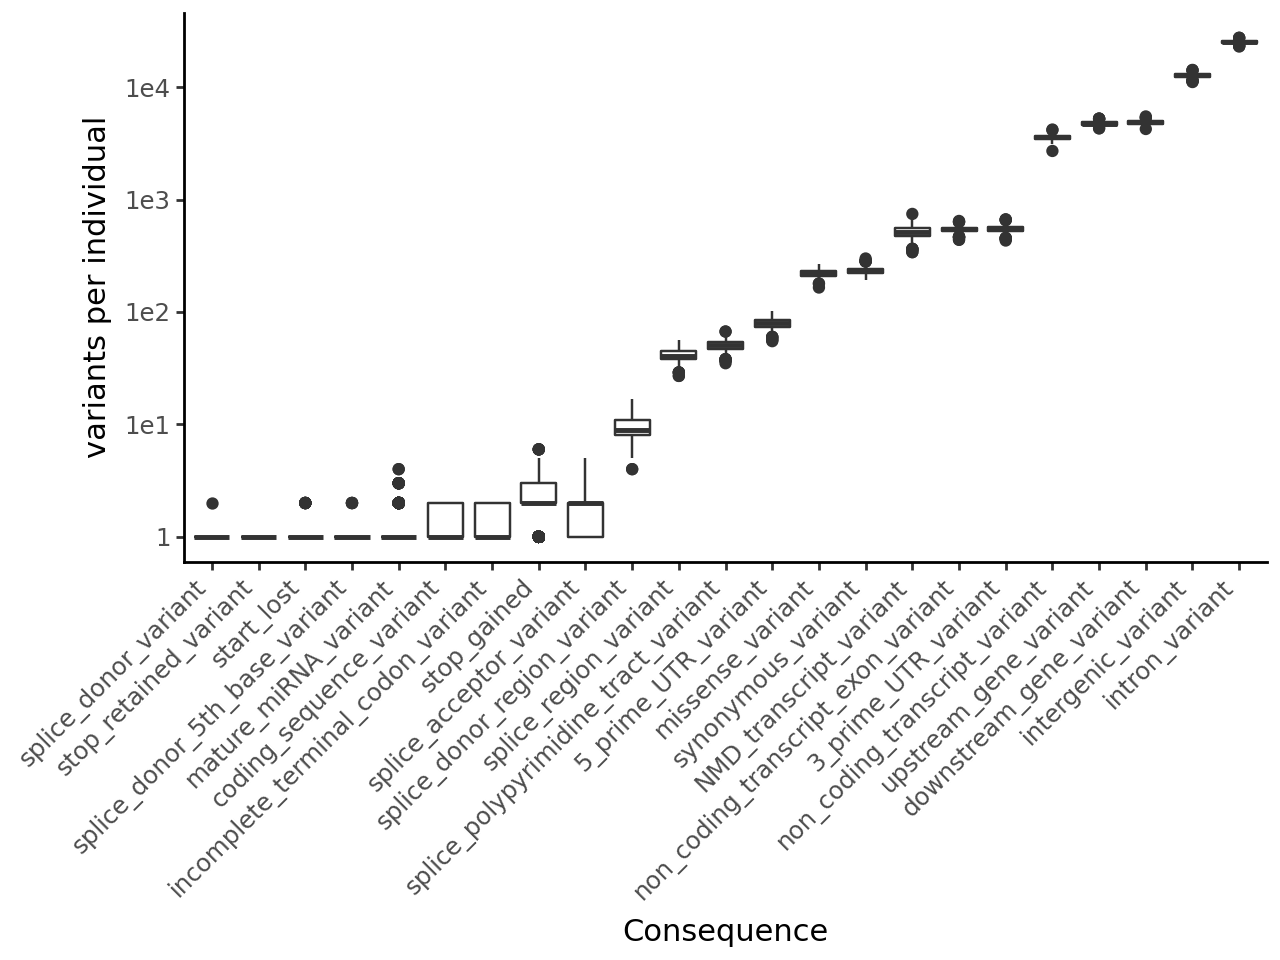

In [63]:
plot = (
    ggplot(c_counts, aes(x="Consequence", y="variants per individual"))  # Specify the x and y variables
    + geom_boxplot()  # aes(fill="IMPACT", color="IMPACT"))  # Add the boxplot layer
    + theme_classic()  # Optional: use a clean theme
    + scale_y_log10()
    + theme(axis_text_x=element_text(angle=45, hjust=1, vjust=1))
)
plot

### Heatmap of individual high impact variant genotypes

In [162]:
anno_col = "Consequence_missense_variant"
genos = gdata[:, gdata.var_names.isin(anno[anno[col] == 1].index)].X
genos

ArrayView([[2, 0, 1, ..., 0, 0, 0],
           [2, 0, 1, ..., 0, 0, 0],
           [2, 0, 1, ..., 0, 0, 0],
           ...,
           [2, 0, 0, ..., 0, 0, 0],
           [2, 0, 0, ..., 0, 0, 0],
           [2, 0, 1, ..., 0, 0, 1]])

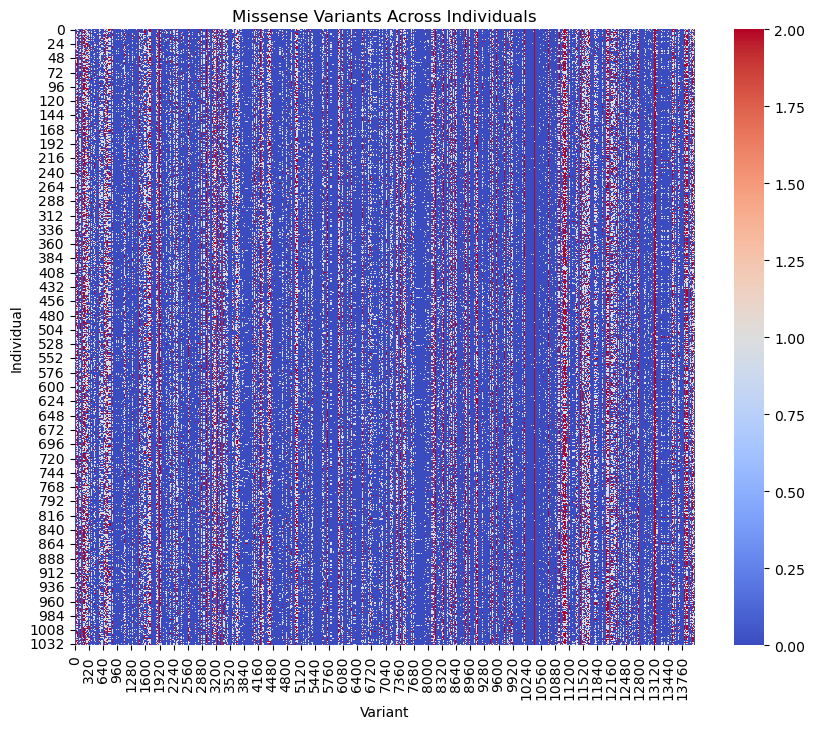

In [166]:
import seaborn as sns

# Create a heatmap of the genotype data (presence of variants)
plt.figure(figsize=(10, 8))
sns.heatmap(genos, cmap="coolwarm", cbar=True)
plt.title("Missense Variants Across Individuals")
plt.xlabel("Variant")
plt.ylabel("Individual")
plt.show()

/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


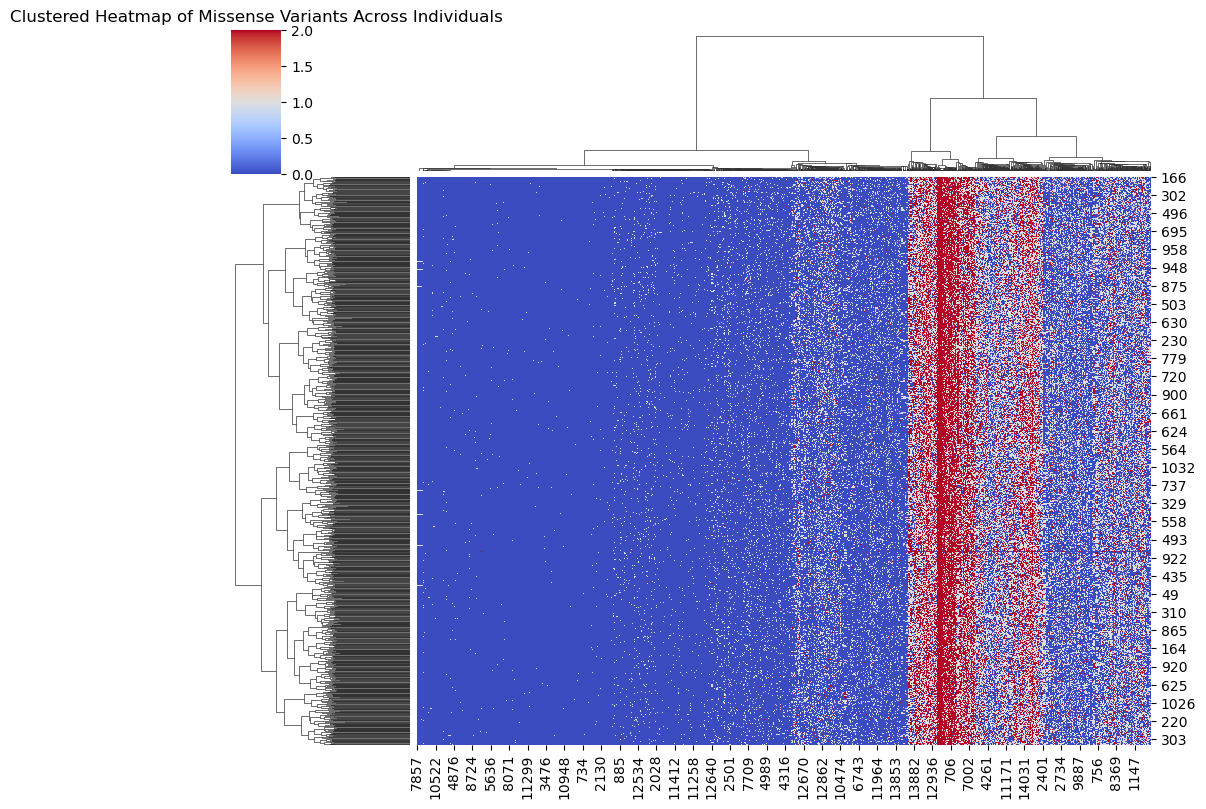

In [167]:
sns.clustermap(genos, cmap="coolwarm", figsize=(10, 8), metric="euclidean", method="ward")

# Display the heatmap
plt.title("Clustered Heatmap of Missense Variants Across Individuals")
plt.show()

### Number of non-na values per variant Consequence

In [206]:
anno_dum = pd.from_dummies(anno_c)
anno_dum.columns = ["Consequence"]
merged = anno_dum.join(anno[["DISTANCE", "TSSDistance", "SIFT", "PolyPhen", "CADD_RAW"]])

In [211]:
nonna_per_cat = merged.groupby("Consequence").count().reset_index().set_index("Consequence")
nonna_per_cat

,DISTANCE,TSSDistance,SIFT,PolyPhen,CADD_RAW
Consequence,,,,,
Consequence_3_prime_UTR_variant,0,0,0,0,1766
Consequence_5_prime_UTR_variant,0,0,0,0,265
Consequence_downstream_gene_variant,13931,0,0,0,13931
Consequence_incomplete_terminal_codon_variant,0,0,0,0,1
Consequence_intergenic_variant,0,0,0,0,33445
Consequence_intron_variant,0,0,0,0,76164
Consequence_mature_miRNA_variant,0,0,0,0,1
Consequence_missense_variant,0,0,806,821,821
Consequence_non_coding_transcript_exon_variant,0,0,0,0,1556


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10


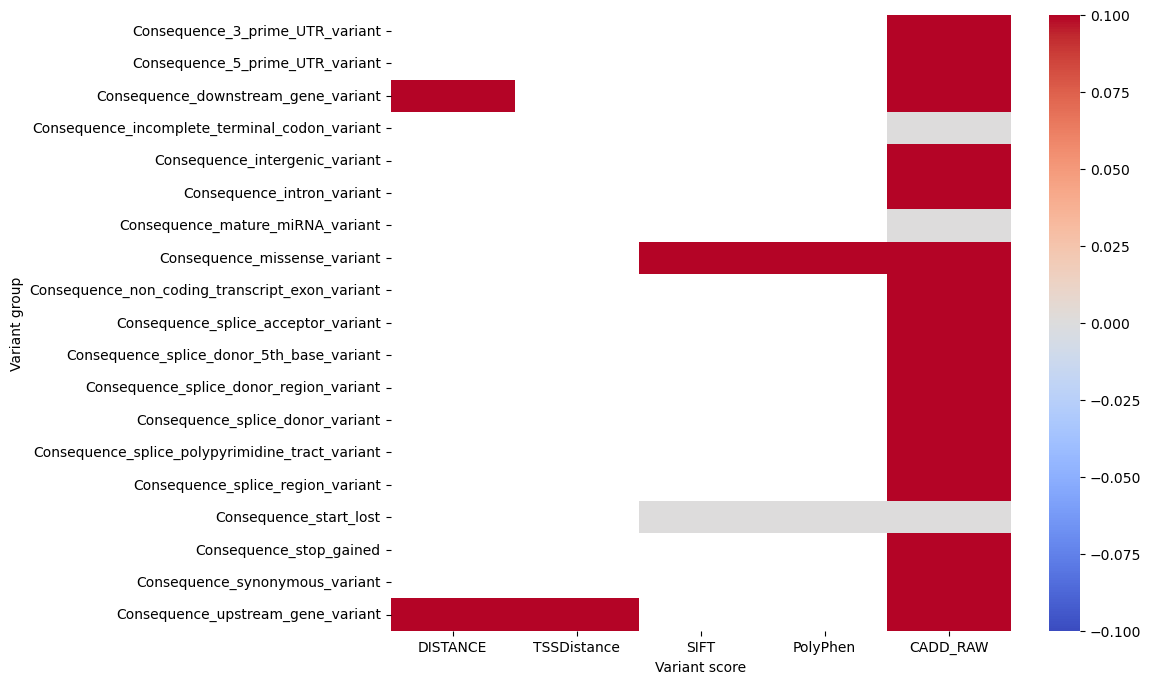

In [217]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.log10(nonna_per_cat), cmap="coolwarm", cbar=True)
plt.title("")
plt.xlabel("Variant score")
plt.ylabel("Variant group")
plt.show()